In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crime_Data_from_2010_to_2019.csv')

## Average Response Times: How quickly do law enforcement agencies respond to reported crimes?

In [3]:
# Convert 'Date Rptd' and 'DATE OCC' to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Calculate the response time in hours
df['Response Time (Hours)'] = (df['Date Rptd'] - df['DATE OCC']).dt.total_seconds() / 3600

# Remove negative response times
df = df[df['Response Time (Hours)'] >= 0]

# Calculate mean and standard deviation
mean_response_time = df['Response Time (Hours)'].mean()
std_dev_response_time = df['Response Time (Hours)'].std()

# Set an upper limit (e.g., mean + 3*standard deviation)
upper_limit = mean_response_time + 3 * std_dev_response_time

# Filter out response times above this upper limit
df_filtered = df[df['Response Time (Hours)'] <= upper_limit]

# Calculate the average response time with the filtered data
average_response_time_filtered = df_filtered['Response Time (Hours)'].mean()

print(f"Average Response Time with Filtered Data: {average_response_time_filtered:.2f} hours")

/tmp/ipykernel_14733/3256517971.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
/tmp/ipykernel_14733/3256517971.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


Average Response Time with Filtered Data: 228.06 hours


## Crime Clearance Rates: What percentage of reported crimes result in arrests or convictions?

In [4]:
df['Status Desc'].unique()

array(['Adult Arrest', 'Invest Cont', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [5]:
# Define the criteria for a cleared case
# We consider 'Adult Arrest' and 'Juv Arrest' as indicators of case clearance
cleared_statuses = ['Adult Arrest', 'Juv Arrest']  # Cleared cases

# Check if each crime is cleared
df['Is Cleared'] = df['Status Desc'].isin(cleared_statuses)

# Calculate the percentage of cleared crimes
cleared_cases = df['Is Cleared'].sum()
total_cases = len(df)
clearance_rate = (cleared_cases / total_cases) * 100
print(f"Crime Clearance Rate: {clearance_rate:.2f}%")

Crime Clearance Rate: 11.07%


## Victim Demographics Analysis

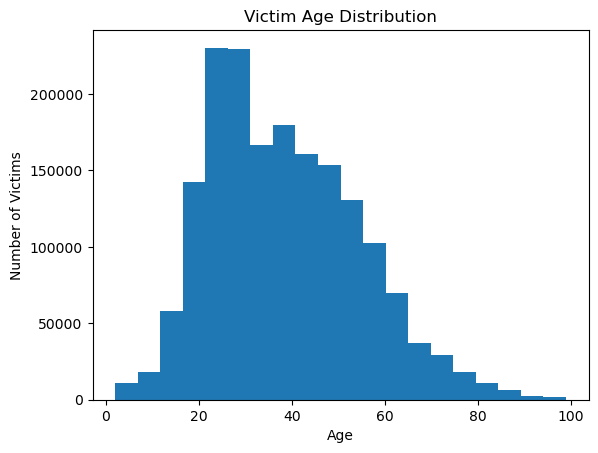

In [6]:
# Analyzing Victim Age
# Convert 'Vict Age' to a numeric type, coercing invalid entries to NaN
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')

# Filter out invalid ages (e.g., negative values, too high values, NaN values)
valid_ages = df[(df['Vict Age'] >= 1) & (df['Vict Age'] <= 100)]

# Plotting the histogram of valid ages
valid_ages['Vict Age'].plot(kind='hist', bins=20, title='Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()

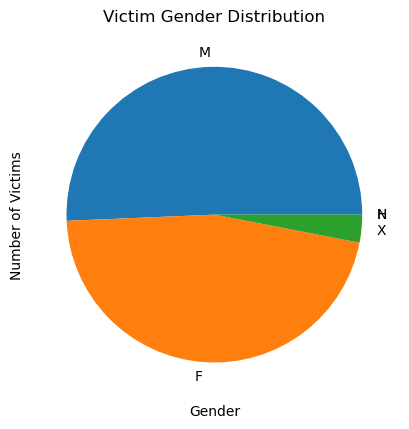

In [7]:
# Analyzing Victim Gender
# Assuming 'Vict Sex' contains M (Male), F (Female), and possibly other identifiers
gender_counts = df['Vict Sex'].value_counts()
gender_counts.plot(kind='pie', title='Victim Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.show()

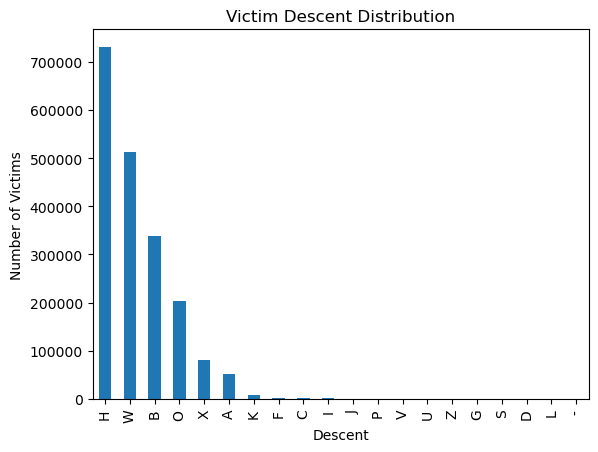

In [8]:
# Analyzing Victim Descent
# Assuming 'Vict Descent' contains codes or descriptions for different racial or ethnic groups
descent_counts = df['Vict Descent'].value_counts()
descent_counts.plot(kind='bar', title='Victim Descent Distribution')
plt.xlabel('Descent')
plt.ylabel('Number of Victims')
plt.show()
#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

## Location Analysis

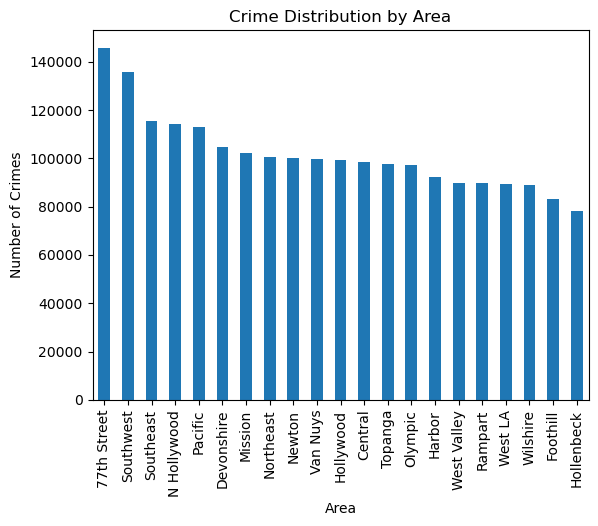

In [9]:
# Location Analysis
# Assuming 'AREA NAME' represents different geographic areas
area_counts = df['AREA NAME'].value_counts()
area_counts.plot(kind='bar', title='Crime Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.show()

## Weapon Analysis

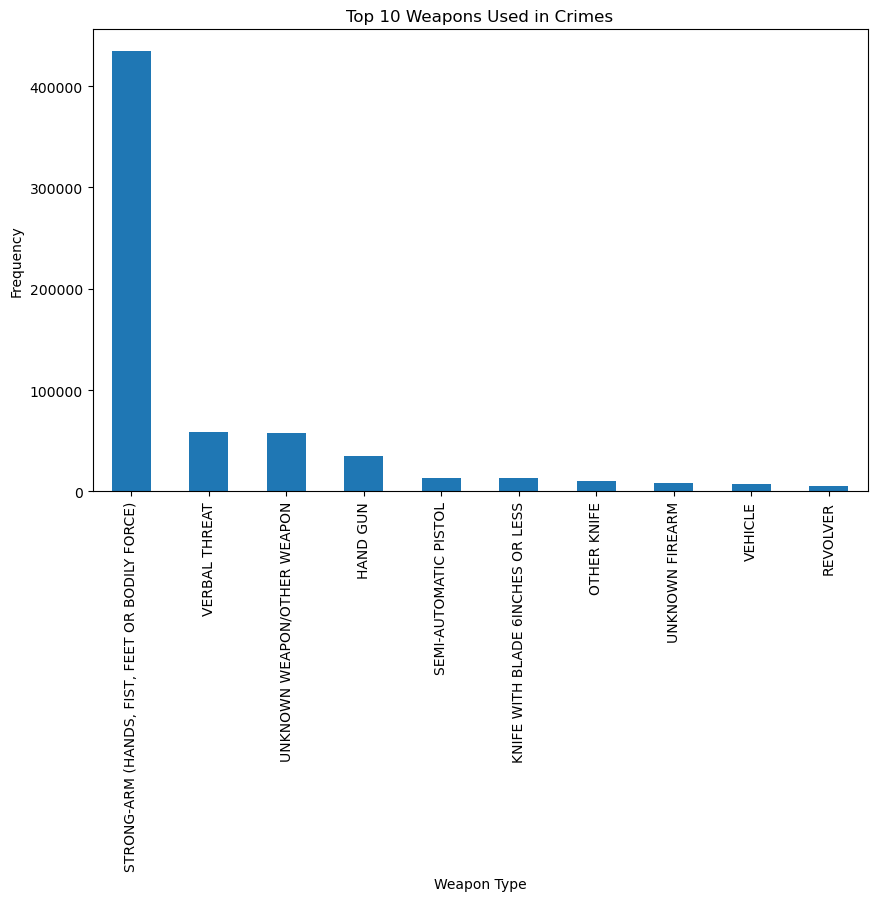

In [10]:
# Filter out missing or empty values in 'Weapon Desc'
df_filtered = df[df['Weapon Desc'].notna() & (df['Weapon Desc'] != '')]

# Counting the occurrences of each weapon type
weapon_counts = df_filtered['Weapon Desc'].value_counts()

# Selecting the top 10 weapons
top_10_weapons = weapon_counts.head(10)

# Plotting the frequency of the top 10 weapons
top_10_weapons.plot(kind='bar', figsize=(10, 6), title='Top 10 Weapons Used in Crimes')
plt.xlabel('Weapon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [11]:
top_10_weapons

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    434353
VERBAL THREAT                                      59052
UNKNOWN WEAPON/OTHER WEAPON                        57908
HAND GUN                                           34694
SEMI-AUTOMATIC PISTOL                              13288
KNIFE WITH BLADE 6INCHES OR LESS                   13103
OTHER KNIFE                                         9806
UNKNOWN FIREARM                                     8147
VEHICLE                                             7321
REVOLVER                                            5550
Name: count, dtype: int64

## Analyzing Crime Types 

In [14]:
# Identifying the top 10 crime types based on the number of crimes
top_10_crimes = df['Crm Cd Desc'].value_counts().head(10)

# Creating a DataFrame for the top 10 crime types with both Crime Code and Description
top_10_crimes_df = pd.DataFrame(top_10_crimes).reset_index()
top_10_crimes_df.columns = ['Crm Cd Desc', 'Number of Crimes']

# Adding Crime Code (Crm Cd) to the DataFrame
top_10_crimes_df['Crm Cd'] = top_10_crimes_df.apply(lambda row: df[df['Crm Cd Desc'] == row['Crm Cd Desc']]['Crm Cd'].values[0], axis=1)

top_10_crimes_df

,Crm Cd Desc,Number of Crimes,Crm Cd
0,BATTERY - SIMPLE ASSAULT,191022,624
1,VEHICLE - STOLEN,163848,510
2,BURGLARY FROM VEHICLE,162951,330
3,THEFT PLAIN - PETTY ($950 & UNDER),150005,440
4,BURGLARY,148050,310
5,THEFT OF IDENTITY,129931,354
6,INTIMATE PARTNER - SIMPLE ASSAULT,115056,626
7,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",110559,740
8,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",94301,230
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER),90379,745


## Analyzing Trends of specific crimes

/tmp/ipykernel_14733/2596964965.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['Year'] = pd.to_datetime(crime_data['DATE OCC']).dt.year


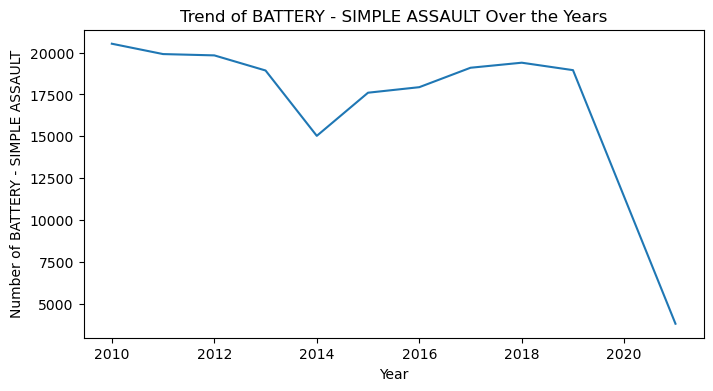

/tmp/ipykernel_14733/2596964965.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['Year'] = pd.to_datetime(crime_data['DATE OCC']).dt.year


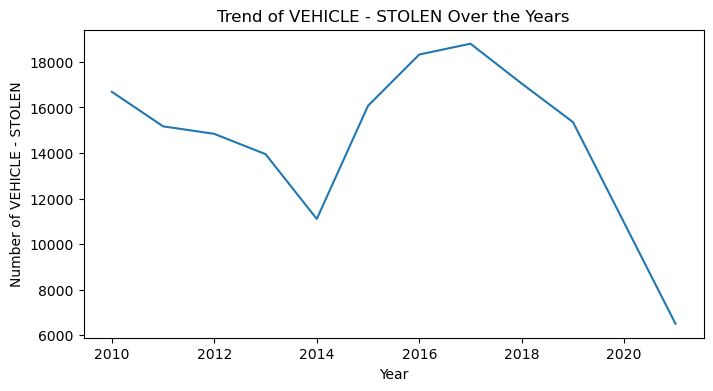

/tmp/ipykernel_14733/2596964965.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['Year'] = pd.to_datetime(crime_data['DATE OCC']).dt.year


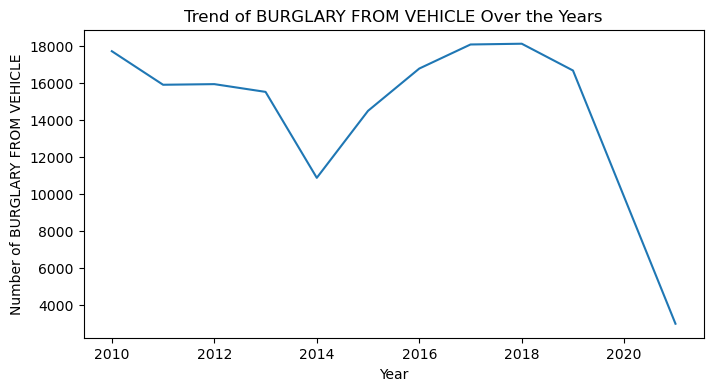

In [20]:
# Filter the DataFrame for the top 3 crimes of interest
crime_1 = 'BATTERY - SIMPLE ASSAULT'
crime_2 = 'VEHICLE - STOLEN'
crime_3 = 'BURGLARY FROM VEHICLE'

crime_data_1 = df[df['Crm Cd Desc'] == crime_1]
crime_data_2 = df[df['Crm Cd Desc'] == crime_2]
crime_data_3 = df[df['Crm Cd Desc'] == crime_3]

# Function to analyze and plot the trend of a specific crime
def plot_crime_trend(crime_data, crime_desc):
    # Trend Analysis
    # Convert 'DATE OCC' to datetime and extract the year
    crime_data['Year'] = pd.to_datetime(crime_data['DATE OCC']).dt.year
    annual_crime_data = crime_data['Year'].value_counts().sort_index()

    # Plotting the trend of the crime over the years
    plt.figure(figsize=(8, 4))
    annual_crime_data.plot(kind='line', title=f'Trend of {crime_desc} Over the Years')
    plt.xlabel('Year')
    plt.ylabel(f'Number of {crime_desc}')
    plt.show()

# Analyze and plot the trends for the selected crimes
plot_crime_trend(crime_data_1, crime_1)
plot_crime_trend(crime_data_2, crime_2)
plot_crime_trend(crime_data_3, crime_3)

/tmp/ipykernel_78143/2589121031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_crimes['Year'] = pd.to_datetime(hate_crimes['DATE OCC']).dt.year


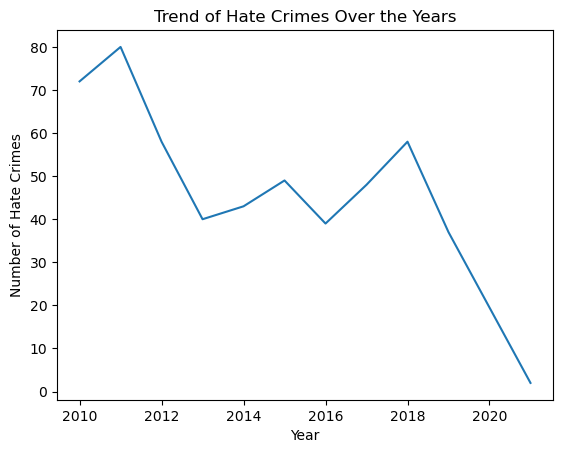

In [10]:
# Identifying Hate Crimes
hate_crimes = df[df['Mocodes'].str.contains('0921', na=False)]

# Trend Analysis
# Convert 'DATE OCC' to datetime and extract the year
hate_crimes['Year'] = pd.to_datetime(hate_crimes['DATE OCC']).dt.year
annual_hate_crimes = hate_crimes['Year'].value_counts().sort_index()

# Plotting the trend of hate crimes over the years
annual_hate_crimes.plot(kind='line', title='Trend of Hate Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.show()

/tmp/ipykernel_78143/112784747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_crimes['Year'] = pd.to_datetime(drug_crimes['DATE OCC']).dt.year


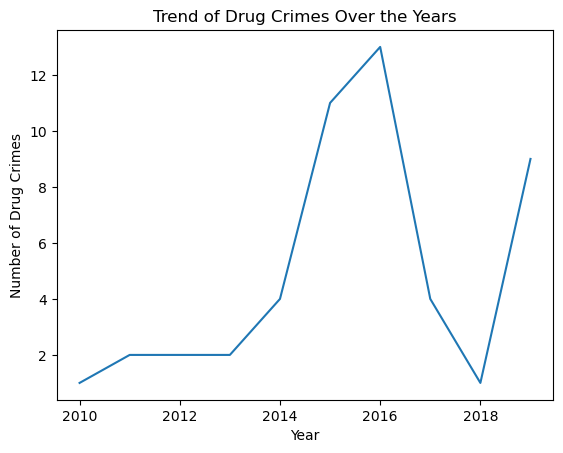

In [50]:
# Identifying Drug Crimes
drug_crime_codes = ['0384', '0413', '2001', '1206'] 
drug_crimes = df[df['Crm Cd'].isin(drug_crime_codes) | df['Crm Cd Desc'].str.contains('DRUG', na=False)]

# Trend Analysis
# Convert 'DATE OCC' to datetime and extract the year
drug_crimes['Year'] = pd.to_datetime(drug_crimes['DATE OCC']).dt.year
annual_drug_crimes = drug_crimes['Year'].value_counts().sort_index()

# Plotting the trend of drug crimes over the years
annual_drug_crimes.plot(kind='line', title='Trend of Drug Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Drug Crimes')
plt.show()

/tmp/ipykernel_78143/1008625389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_crimes['Year'] = pd.to_datetime(gun_crimes['DATE OCC']).dt.year


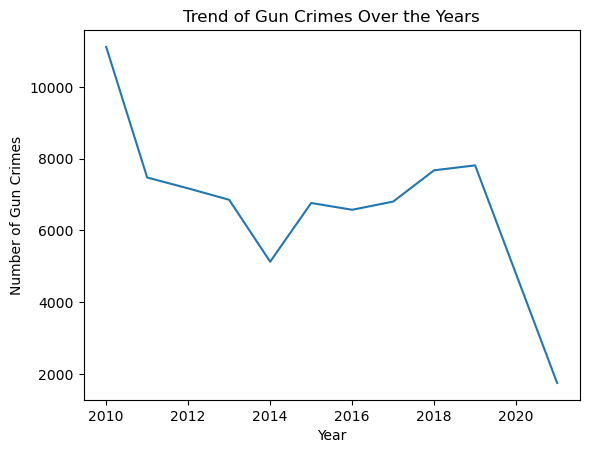

In [48]:
# Identifying Gun Crimes
gun_crime_code = ['0302','0312', '0387', '1410'] 
gun_crimes = df[df['Crm Cd'].isin(gun_crime_code) | df['Crm Cd Desc'].str.contains('GUN', na=False)]

# Trend Analysis
# Convert 'DATE OCC' to datetime and extract the year
gun_crimes['Year'] = pd.to_datetime(gun_crimes['DATE OCC']).dt.year
annual_gun_crimes = gun_crimes['Year'].value_counts().sort_index()

# Plotting the trend of gun crimes over the years
annual_gun_crimes.plot(kind='line', title='Trend of Gun Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Gun Crimes')
plt.show()

## Crime Hotspots on a Map

In [ ]:
import folium
from folium.plugins import HeatMap

# Prepare the data - ensure no null values in latitude and longitude
df = df.dropna(subset=['LAT', 'LON'])

# Create a map centered around an average location in your dataset
map_center = [df['LAT'].mean(), df['LON'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=11)

# Add a heatmap to the map
heat_data = [[row['LAT'], row['LON']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(crime_map)

# Save the map to an HTML file
crime_map.save('LA_Crime_Heatmap.html')


## Identifying top premises for crimes

In [54]:
# Identifying the top 10 premises based on the number of crimes
top_10_premises = df['Premis Desc'].value_counts().head(10)

# Creating a DataFrame for the top 10 premises
top_10_premises_df = pd.DataFrame(top_10_premises).reset_index()
top_10_premises_df.columns = ['Premis Desc', 'Number of Crimes']

top_10_premises_df

,Premis Desc,Number of Crimes
0,STREET,479383
1,SINGLE FAMILY DWELLING,433330
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",267395
3,PARKING LOT,151590
4,SIDEWALK,105689
5,OTHER BUSINESS,97024
6,"VEHICLE, PASSENGER/TRUCK",79900
7,DRIVEWAY,42977
8,GARAGE/CARPORT,37955
9,RESTAURANT/FAST FOOD,29220


/tmp/ipykernel_78143/4147106452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_premises.values, y=top_10_premises.index, palette="viridis")


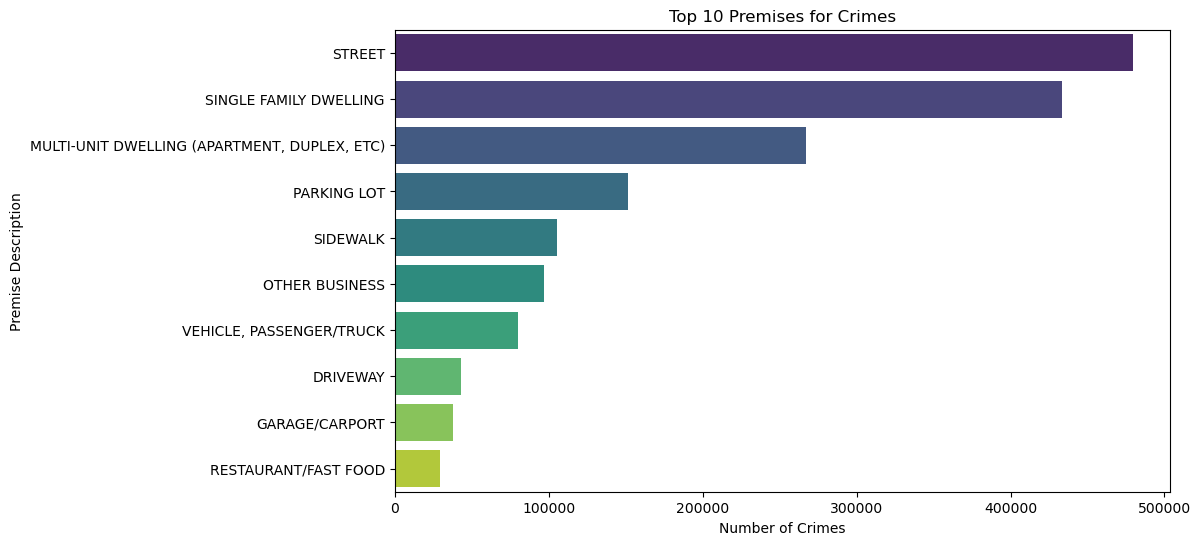

In [57]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_premises.values, y=top_10_premises.index, palette="viridis")
plt.title('Top 10 Premises for Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Premise Description')
plt.show()